In [101]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy

In [102]:
# Load data
x_train = np.load('x_train.npy')
y_train = np.expand_dims(np.load('y_train.npy'), axis=1)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy')

In [103]:
# feature normalization
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

x_train = NormalizeData(x_train)
y_train = NormalizeData(y_train)
x_test = NormalizeData(x_test)
y_test = NormalizeData(y_test)

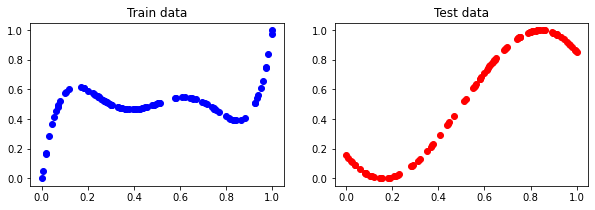

In [108]:
# plotting the data
plt.figure(figsize = (10,3))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, c='b') 
plt.title("Train data")
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, c='r') 
plt.title("Test data")
plt.show()

In [109]:
# adding bias term
x_train = np.hstack((np.ones_like(x_train), x_train))
x_test = np.hstack((np.ones_like(x_test), x_test))

### Linear Regression function

In [110]:
def LinearRegression(x_train,y_train):
    
    def get_gradient(w, x, y):
        y_estimate = x.dot(w).flatten()
        error = (y.flatten() - y_estimate)
        mse = (1.0/len(x))*np.sum(np.power(error, 2))
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient, mse

    w = np.random.randn(2)
    alpha = 0.1
    tolerance = 1e-7

    # Perform Gradient Descent
    iterations = 1
    while True:
        gradient, error = get_gradient(w, x_train, y_train)
        new_w = w - alpha * gradient

        # Stopping Condition
        if np.sum(abs(new_w - w)) < tolerance:
            print("Converged.")
            break

        # Print error every 50 iterations
        if iterations % 100 == 0:
            print("Iteration: %d - Error: %.4f" %(iterations, error))

        iterations += 1
        w = new_w

    print ("w =",w)
    
    return w

### LR on train data

In [111]:
w = LinearRegression(x_train, y_train)

Iteration: 100 - Error: 0.0295
Iteration: 200 - Error: 0.0180
Iteration: 300 - Error: 0.0168
Iteration: 400 - Error: 0.0164
Iteration: 500 - Error: 0.0162
Iteration: 600 - Error: 0.0160
Iteration: 700 - Error: 0.0158
Iteration: 800 - Error: 0.0156
Iteration: 900 - Error: 0.0155
Iteration: 1000 - Error: 0.0153
Iteration: 1100 - Error: 0.0152
Iteration: 1200 - Error: 0.0151
Iteration: 1300 - Error: 0.0150
Iteration: 1400 - Error: 0.0150
Iteration: 1500 - Error: 0.0149
Iteration: 1600 - Error: 0.0148
Iteration: 1700 - Error: 0.0148
Iteration: 1800 - Error: 0.0147
Iteration: 1900 - Error: 0.0147
Iteration: 2000 - Error: 0.0147
Iteration: 2100 - Error: 0.0146
Iteration: 2200 - Error: 0.0146
Iteration: 2300 - Error: 0.0146
Iteration: 2400 - Error: 0.0146
Iteration: 2500 - Error: 0.0145
Iteration: 2600 - Error: 0.0145
Iteration: 2700 - Error: 0.0145
Iteration: 2800 - Error: 0.0145
Iteration: 2900 - Error: 0.0145
Iteration: 3000 - Error: 0.0145
Iteration: 3100 - Error: 0.0145
Iteration: 3200 -

### Plot LR on train data

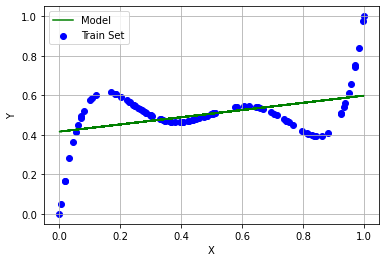

In [112]:
plt.plot(x_train[:,1], x_train.dot(w), c='g', label='Model')
plt.scatter(x_train[:,1], y_train, c='b', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### LR on test data

In [113]:
w = LinearRegression(x_test, y_test)

Iteration: 100 - Error: 0.4853
Iteration: 200 - Error: 0.0492
Iteration: 300 - Error: 0.0191
Iteration: 400 - Error: 0.0168
Iteration: 500 - Error: 0.0164
Iteration: 600 - Error: 0.0162
Iteration: 700 - Error: 0.0161
Iteration: 800 - Error: 0.0159
Iteration: 900 - Error: 0.0158
Iteration: 1000 - Error: 0.0157
Iteration: 1100 - Error: 0.0156
Iteration: 1200 - Error: 0.0155
Iteration: 1300 - Error: 0.0154
Iteration: 1400 - Error: 0.0153
Iteration: 1500 - Error: 0.0153
Iteration: 1600 - Error: 0.0152
Iteration: 1700 - Error: 0.0152
Iteration: 1800 - Error: 0.0152
Iteration: 1900 - Error: 0.0151
Iteration: 2000 - Error: 0.0151
Iteration: 2100 - Error: 0.0151
Iteration: 2200 - Error: 0.0150
Iteration: 2300 - Error: 0.0150
Iteration: 2400 - Error: 0.0150
Iteration: 2500 - Error: 0.0150
Iteration: 2600 - Error: 0.0150
Iteration: 2700 - Error: 0.0150
Iteration: 2800 - Error: 0.0150
Iteration: 2900 - Error: 0.0150
Iteration: 3000 - Error: 0.0150
Iteration: 3100 - Error: 0.0150
Iteration: 3200 -

### Plot LR on test data

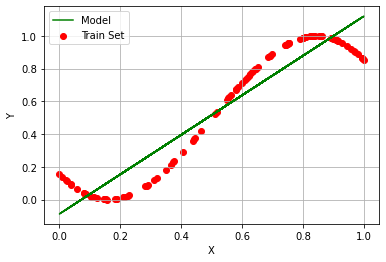

In [114]:
plt.plot(x_test[:,1], x_test.dot(w), c='g', label='Model')
plt.scatter(x_test[:,1], y_test, c='r', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# """"""""""""""""""""""""""""""""""""""""

In [156]:
global model_order
model_order = 5 # select model order

x_train_p = np.load('x_train.npy')
x_test_p = np.load('x_test.npy') 

x_train_p = NormalizeData(x_train_p)
x_test_p = NormalizeData(x_test_p)

x_train_p = np.power(x_train_p, range(model_order))
x_test_p = np.power(x_test_p, range(model_order))

### Polynomial regression function

In [157]:
def PolyReg(x_train_p, y_train):

    def get_gradient_p(w_p, x, y):
        y_estimate = x.dot(w_p).flatten()
        error = (y.flatten() - y_estimate)
        mse = (1.0/len(x))*np.sum(np.power(error, 2))
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient, mse

    w_p = np.random.randn(model_order)
    alpha = 0.8
    tolerance = 1e-6

    # Perform Stochastic Gradient Descent
    epochs = 1
    decay = 0.99
    batch_size = 10
    iterations = 0
    while True:
        order = np.random.permutation(len(x_train_p))
        x_train_p = x_train_p[order]
        y_train = y_train[order]
        b=0
        while b < len(x_train_p):
            tx = x_train_p[b : b+batch_size]
            ty = y_train[b : b+batch_size]
            gradient = get_gradient_p(w_p, tx, ty)[0]
            error = get_gradient_p(w_p, x_train_p, y_train)[1]
            w_p -= alpha * gradient
            iterations += 1
            b += batch_size

        # Keep track of our performance
        if epochs%100==0:
            new_error = get_gradient_p(w_p, x_train_p, y_train)[1]
            print("Epoch: %d - Error: %.4f" %(epochs, new_error))

            # Stopping Condition
            if abs(new_error - error) < tolerance:
                print("Converged.")
                break

        alpha = alpha * (decay ** int(epochs/1000))
        epochs += 1

    print("w =",w_p)
    print("Total iterations =", iterations)
    
    return w_p

In [152]:
w_p = PolyReg(x_train_p, y_train)

Epoch: 100 - Error: 0.0061
Epoch: 200 - Error: 0.0106
Epoch: 300 - Error: 0.0055
Epoch: 400 - Error: 0.0058
Epoch: 500 - Error: 0.0064
Epoch: 600 - Error: 0.0054
Epoch: 700 - Error: 0.0053
Epoch: 800 - Error: 0.0053
Epoch: 900 - Error: 0.0053
Epoch: 1000 - Error: 0.0052
Epoch: 1100 - Error: 0.0050
Epoch: 1200 - Error: 0.0050
Epoch: 1300 - Error: 0.0050
Converged.
w = [ 0.29979285  1.49014475 -2.83444216  0.59526557  2.32474344 -1.13361579
 -0.40243801  0.30156204  0.52992552 -1.17567505 -0.74455599 -0.37386065
 -0.1051587   0.53443062  1.70869616]
Total iterations = 13000


### Plot PLR on train data

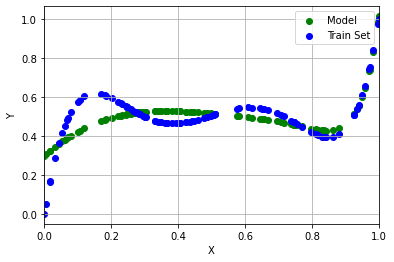

In [153]:
y_model = np.polyval(w_p[::-1], x_train_p[:,1])
plt.scatter(x_train_p[:,1], y_model, c='g', label='Model')
plt.scatter(x_train_p[:,1], y_train, c='b', label='Train Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.show()

In [154]:
w_p_test = PolyReg(x_test_p, y_test)

Epoch: 100 - Error: 0.0035
Epoch: 200 - Error: 0.0011
Epoch: 300 - Error: 0.0021
Epoch: 400 - Error: 0.0007
Epoch: 500 - Error: 0.0023
Epoch: 600 - Error: 0.0013
Epoch: 700 - Error: 0.0005
Epoch: 800 - Error: 0.0039
Epoch: 900 - Error: 0.0004
Epoch: 1000 - Error: 0.0010
Epoch: 1100 - Error: 0.0004
Epoch: 1200 - Error: 0.0004
Converged.
w = [ 0.09949239 -0.99873955  3.38358478  0.85208125 -0.08345447 -2.30716066
 -0.4139633   0.41902551  0.26069803 -1.28642963 -0.29205498  0.33127381
  0.21020329  0.23217916  0.47293921]
Total iterations = 12000


### Plot PLR on test data

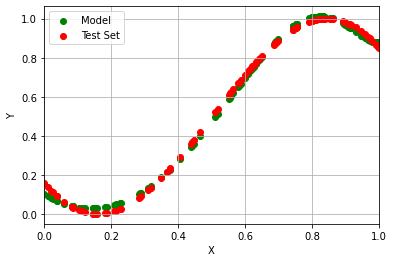

In [159]:
y_model_test = np.polyval(w_p_test[::-1], x_test_p[:,1])
plt.scatter(x_test_p[:,1], y_model_test, c='g', label='Model')
plt.scatter(x_test_p[:,1], y_test, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.show()